In [35]:
# ========== ----- ========== Import Libraries ========== ----- ========== #

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# ========== ----- ========== End ========== ----- ========== #

In [36]:
# ========== ----- ========== Import Dataset ========== ----- ========== #

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('final_df.csv')
df = df[df["avg_elec_months_number"] <= 10000]
df = df[df["avg_gaz_months_number"] <= 10000]

# get the number of rows and columns
num_rows, num_cols = df.shape

print('Number of Rows: ', num_rows)
print('Number of Columns: ', num_cols, "\n")

# Display the first few rows of the DataFrame
print(df.head())

# ========== ----- ========== End ========== ----- ========== #

Number of Rows:  135458
Number of Columns:  50 

   client_catg  avg_elec_reading_remarque  avg_elec_consommation_level_1  \
0           11                   6.971429                     352.400000   
1           11                   7.216216                     557.540541   
2           11                   7.055556                     798.611111   
3           11                   6.150000                       1.200000   
4           11                   8.857143                     663.714286   

   avg_elec_consommation_level_2  avg_elec_consommation_level_3  \
0                      10.571429                       0.000000   
1                       0.000000                       0.000000   
2                      37.888889                       0.000000   
3                       0.000000                       0.000000   
4                     104.857143                     117.357143   

   avg_elec_consommation_level_4  avg_elec_months_number  \
0                       0.00000

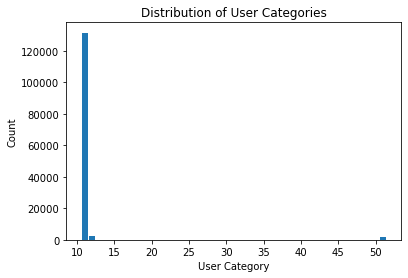

We have 3 categories (11, 12, 51), most of clients are related to category 11.


In [37]:
# ========== ----- ========== User Category ========== ----- ========== #

# Count the number of occurrences of each category
category_counts = df['client_catg'].value_counts()

# Create a bar chart of the category counts
plt.bar(category_counts.index, category_counts.values)

# Set axis labels and title
plt.xlabel('User Category')
plt.ylabel('Count')
plt.title('Distribution of User Categories')

# Display the plot
plt.show()
print("We have 3 categories (11, 12, 51), most of clients are related to category 11.")
# ========== ----- ========== End ========== ----- ========== #

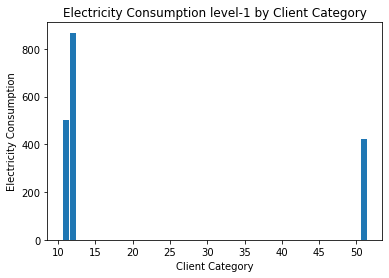

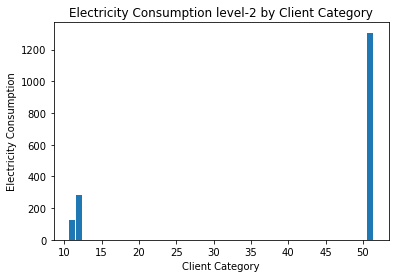

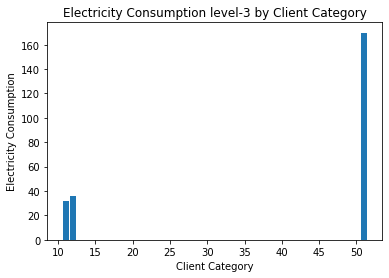

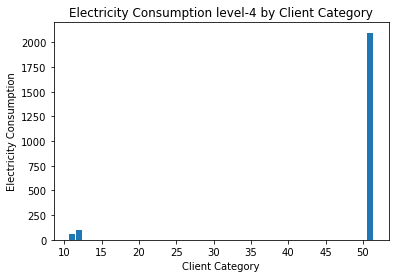

Category 3 consumes electricity more than category 1 & 2.


In [38]:
# ========== ----- ========== Electricity Consumption ========== ----- ========== #

# Group the data by client category and calculate the mean electricity consommation for each category

titles = ["Electricity Consumption level-1 by Client Category",
          "Electricity Consumption level-2 by Client Category",
          "Electricity Consumption level-3 by Client Category",
          "Electricity Consumption level-4 by Client Category",
          ]
groups = ["avg_elec_consommation_level_1",
          "avg_elec_consommation_level_2",
          "avg_elec_consommation_level_3",
          "avg_elec_consommation_level_4",
          ]

for group, title in zip(groups, titles):
    grouped_data = df.groupby('client_catg')[
        group].mean()
    # Create a bar chart
    plt.bar(grouped_data.index, grouped_data.values)
    plt.title(title)
    plt.xlabel('Client Category')
    plt.ylabel('Electricity Consumption')
    plt.show()

print("Category 3 consumes electricity more than category 1 & 2.")
# ========== ----- ========== End ========== ----- ========== #


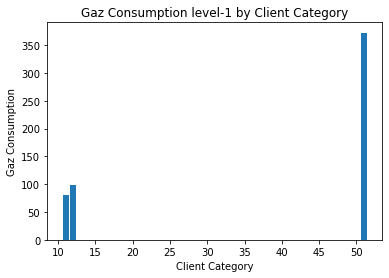

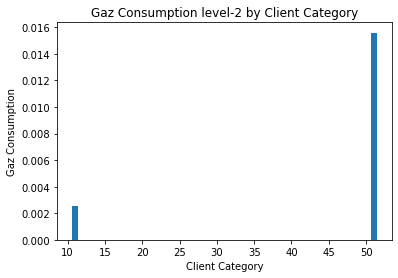

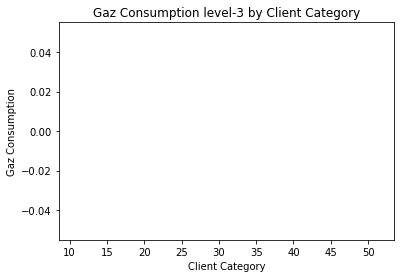

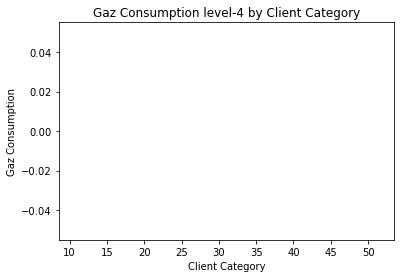

Category 3 consumes Gaz more than category 1 & 2.
In general, no categpry consume more than level 2 in Gaz.


In [39]:
# ========== ----- ========== Gaz Consumption ========== ----- ========== #

# Group the data by client category and calculate the mean gaze consommation for each category

titles = ["Gaz Consumption level-1 by Client Category",
          "Gaz Consumption level-2 by Client Category",
          "Gaz Consumption level-3 by Client Category",
          "Gaz Consumption level-4 by Client Category",
          ]
groups = ["avg_gaz_consommation_level_1",
          "avg_gaz_consommation_level_2",
          "avg_gaz_consommation_level_3",
          "avg_gaz_consommation_level_4",
          ]

for group, title in zip(groups, titles):
    grouped_data = df.groupby('client_catg')[
        group].mean()
    # Create a bar chart
    plt.bar(grouped_data.index, grouped_data.values)
    plt.title(title)
    plt.xlabel('Client Category')
    plt.ylabel('Gaz Consumption')
    plt.show()

print("Category 3 consumes Gaz more than category 1 & 2.")
print("In general, no categpry consume more than level 2 in Gaz.")
# ========== ----- ========== End ========== ----- ========== #


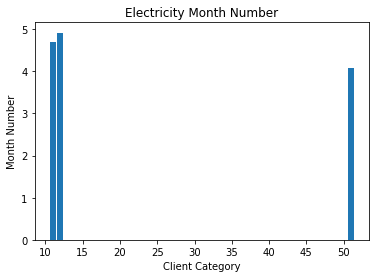

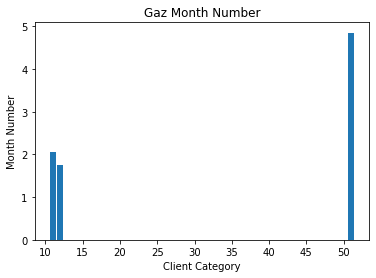

In [40]:
# ========== ----- ========== Gaze & Electricity Month Number ========== ----- ========== #
        
# Group the data by client category and calculate the mean gaze consommation for each category

titles = ["Electricity Month Number",
          "Gaz Month Number",
          ]
groups = ["avg_elec_months_number",
          "avg_gaz_months_number",
          ]

for group, title in zip(groups, titles):
    grouped_data = df.groupby('client_catg')[
        group].mean()
    # Create a bar chart
    plt.bar(grouped_data.index, grouped_data.values)
    plt.title(title)
    plt.xlabel('Client Category')
    plt.ylabel('Month Number')
    plt.show()

# ========== ----- ========== End ========== ----- ========== #


0    127894
1      7564
Name: target, dtype: int64


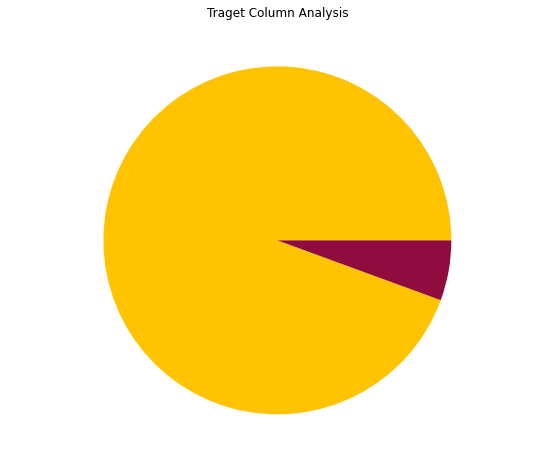

In [41]:
# ========== ----- ========== Traget Column Analysis ========== ----- ========== #

# get the values of Target and their counts
target_counts = df['target'].value_counts()
print(target_counts)

# Create a pie chart
custom_colors = ['#FFC300', '#900C3F']
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(target_counts, labels=["Unfraud", "Fraud"],
       colors=custom_colors, labeldistance=1.2, textprops={'color': 'white', 'fontsize': 16})
# Add a title
plt.title('Traget Column Analysis')
# Show the chart
plt.show()

# ========== ----- ========== End ========== ----- ========== #
